
# Using APIs

Please inlcude your names below  
Also, please edit the name of the file and include the names of the two(or three) people answering

Pair answering the assignment: David Steiger, Tim Moser, Dominik Frauchiger  
Pair giving feedback: Eleonora Pura, Christian Skorski

In [3]:
import requests
import json
import os

## 1. Google books
### Setting the request URL parameters
You can set the parameters of the API request according to the documentation below. The first part of the request is always the same, and the "q" which stands for question will take various parameters. <br>
More documentation can be found at: https://developers.google.com/books/docs/v1/using?hl=vi#ids

<img src="parameters.png" width=80%> </img>

**Example**: `https://www.googleapis.com/books/v1/volumes?q=isbn:9780141909882` returns information about the book with the given ISBN number (Everything is illuminated by Jonathan Safran Foer).

**Exercise**

1. Using the above parameters create the following request URLs!
    1. Requesting books that have "potter" in the title
    2. Requesting books that have "doyle" as author
    3. With isbn "1904633684"
    4. With id "2bGdK8CRKoEC"
    5. Second result page when searching books that has "detective" listed in the category list
    6. Second result page when searching books that have "potter in the title but showing 40 results in one page, not 10. 
<br>

Try and see whether they work with `requests.get()`!

In [4]:
result_A = 'https://www.googleapis.com/books/v1/volumes?q=title:potter'
result_B = 'https://www.googleapis.com/books/v1/volumes?q=autor:doyle'
result_C = 'https://www.googleapis.com/books/v1/volumes?q=isbn:1904633684'
result_D = 'https://www.googleapis.com/books/v1/volumes?q=id:2bGdK8CRKoEC'
result_E = 'https://www.googleapis.com/books/v1/volumes?q=subject:detective&startIndex=11'
result_F = 'https://www.googleapis.com/books/v1/volumes?q=title:potter&startIndex=41&maxResults=40'

#check with requests

# uncomment to check
#requests.get(result_A).text
#requests.get(result_B).text
#requests.get(result_C).text
#requests.get(result_D).text
#requests.get(result_E).text
#requests.get(result_F).text

# works in the browser too

1G. Define a function that sends a request to the google books API with the URL parameters as inputs to the function. Try to incorporate as many as the variables as possible and output a URL according to the settings you want to have. Don't forget to write a docstring explaning how the function works. Docstrings are explanations to functions, describing the input, output, and purpose of the function. If you haven't used them before, you can find more examples for example at: https://www.geeksforgeeks.org/python-docstrings/

In [5]:
def request_books_api(value:str, field = "", options = {}):
    '''
    arg1: Use value to enter search-query.
    arg2: To precisie your query you can use this fields https://developers.google.com/books/docs/v1/using?hl=vi#ids or none.
    arg3: You can also append options as an dictionary.
    Returns all volumes containing your search-query.
    '''
    
    # appens : if string not empty
    if field: field += ":"
    
    # creates url
    url = "https://www.googleapis.com/books/v1/volumes?q=%s%s" % (field, value)
    
    # Appends possible options
    for key in options:
        url += "&%s=%s" % (key, options[key])

    return requests.get(url).text

# To test uncomment
#print(request_books_api("potter", "title"))
#print(request_books_api("detective", "subject", {'startIndex': 11, 'maxResults': 40}))
#print(request_books_api("cat"))


#### Status codes

Responses contain information even without looking into the textual content. printing the response tells us the URL we requested, the date, its status, the content type and the size of the response object

The most important for us is the status: it tells us whether our request has been successful: You can find a list of HTTP status codes here https://en.wikipedia.org/wiki/List_of_HTTP_status_codes.
Or, you can always check HTTP Status Cats: https://www.flickr.com/photos/girliemac/sets/72157628409467125

The most important status codes for us are:

- successful call: code 200
- client error: 4xx, e.g. 401: Unauthorized, 404: Not found
- server error: 5xx, e.g. 500: Internal Server Error, 502: Bad Gateway

### 2. Parsing json

1. Using the previously defined function, query the book with isbn number 1904633684 and print the text of the result. 

In [6]:
book = request_books_api("1904633684", "isbn")

2. Now load the previous response into a json object.:

In [7]:
js_book = json.loads(book)

3. What are the highest level keys of the json object?

In [8]:
for key in js_book.keys():
    print(key)

kind
totalItems
items


4. What is the type of the value of 'items' key?

In [9]:
print(type(js_book['items']))

<class 'list'>


5. Parse the following information from the json object

In [10]:
### Total number of items returned by the request
print("Total Items: %s" % js_book['totalItems'])

### Title of the book
print("Book Title: %s" % js_book['items'][0]['volumeInfo'].get('title', "NaN"))


### Authors of the book
print("Book Authors: %s" % js_book['items'][0]['volumeInfo'].get('authors', "NaN"))

### Date of publishing
print("Date of publishing: %s" % js_book['items'][0]['volumeInfo'].get('publishedDate', "NaN"))

### Page Count
print("Page Count: %s" % js_book['items'][0]['volumeInfo'].get('pageCount', "NaN"))

### Categories
print("Categories: %s" % js_book['items'][0]['volumeInfo'].get('categories', "NaN"))

### Average Rating
print("Average Rating: %s" % js_book['items'][0]['volumeInfo'].get('averageRating', "NaN"))

### Rating Count
print("Rating Count: %s" % js_book['items'][0]['volumeInfo'].get('ratingsCount', "NaN"))

### Is it avaliable as Epublication (Epub)
print("Epublication? %s" % js_book['items'][0]['accessInfo']['epub']['isAvailable'])


Total Items: 1
Book Title: The Case-book of Sherlock Holmes
Book Authors: ['Arthur Conan Doyle']
Date of publishing: 2004
Page Count: 304
Categories: ['Detective and mystery stories']
Average Rating: 3.5
Rating Count: 23
Epublication? False


Unlike in the case of requesting books by IDs, the requests in which you search for author or title usually have more than one book as a result. Try searching for books that contain a specific word in their title.

6. Once you obtain the result of the request as a json object, loop through all books in the json and print out the **title** of all the books. 

In [80]:
java_books = json.loads(request_books_api("Java", "title"))['items']
for java_book in java_books:
    print(java_book['volumeInfo']['title'])

Das Java-Tutorial
Java Web Services in a Nutshell
Pro XML Development with Java Technology
Java Illuminated
Advances in Data and Web Management
Das Java 6 codebook
Learn Java for Android Development
Java RMI
A Practical Guide to Localization
Beginning Java Programming


7. Now search for books with a category and print out the authors

In [82]:
java_books = json.loads(request_books_api("thriller", "subject"))['items']
for java_book in java_books:
    print(java_book['volumeInfo']['authors'])

['Gary Botting']
['D. J. Adams']
['Ramlee Awang Murshid']
['Andrea Kane']
['Neal Shusterman']
['Ramlee Awang Murshid']
['David Docherty']
['William Mark']
['Stephen Hunter']
['Stephen Coonts']


8. Define a function that given an item in the json object (the meta information about one book) returns a list with the following attributes: `title, authors, publishedDate, pageCount, categories, averageRating, ratingsCount, epub`. 
<br>
Note that **not** every book has all the features required. If a piece of information is missing, your code should write NaN instead in place of the value. 

In [99]:
def parse_json(js_book):
    '''the function takes a book item as an input and returns a list of the extracted features'''
    
    #print(js_book)

    ### Title of the book
    title = js_book['volumeInfo'].get('title', "NaN")

    ### Authors of the book
    authors = js_book['volumeInfo'].get('authors', "NaN")

    ### Date of publishing
    publishedDate = js_book['volumeInfo'].get('publishedDate', "NaN")

    ### Page Count
    pageCount = js_book['volumeInfo'].get('pageCount', "NaN")

    ### Categories
    categories = js_book['volumeInfo'].get('categories', "NaN")

    ### Average Rating
    averageRating = js_book['volumeInfo'].get('averageRating', "NaN")

    ### Rating Count
    ratingsCount = js_book['volumeInfo'].get('ratingsCount', "NaN")

    ### Is it avaliable as Epublication (Epub)
    epub = js_book['accessInfo']['epub']['isAvailable']
    
    return title, authors, publishedDate, pageCount, categories, averageRating, ratingsCount, epub

# To test uncomment
#books = json.loads(request_books_api("Java", "title"))['items']
#for book in books:
#    print("Title: %s\nAuthors: %s\nPublished Date: %s\nPage Count: %s\nCategories: %s\nAverage Rating: %s\nRatings Count: %s\nEpub? %s\n"
#    % parse_json(book))

Title: Das Java-Tutorial
Authors: NaN
Published Date: 2007
Page Count: 734
Categories: NaN
Average Rating: NaN
Ratings Count: NaN
Epub? False

Title: Java Web Services in a Nutshell
Authors: ['Kim Topley']
Published Date: 2003
Page Count: 642
Categories: ['Computers']
Average Rating: 4.0
Ratings Count: 1
Epub? False

Title: Pro XML Development with Java Technology
Authors: ['Ajay Vohra']
Published Date: 2007-02-01
Page Count: 472
Categories: ['Computers']
Average Rating: 4.0
Ratings Count: 3
Epub? True

Title: Java Illuminated
Authors: ['Anderson']
Published Date: 2018-01-15
Page Count: 1204
Categories: ['Medical']
Average Rating: NaN
Ratings Count: NaN
Epub? False

Title: Advances in Data and Web Management
Authors: ['Guozhu Dong', 'Xuemin Lin', 'Wei Wang', 'Yun Yang', 'Jeffrey Xu Yu']
Published Date: 2007-06-26
Page Count: 898
Categories: ['Computers']
Average Rating: 5.0
Ratings Count: 1
Epub? False

Title: Das Java 6 codebook
Authors: ['Dirk Louis', 'Peter Müller']
Published Date: 

### 3. New York Times API

Your task in this exercise will be to compare the amount of Brexit, Trump and Corona related articles in the last 6 months, using an API that the New York Times provides. 

Start with creating an API key on the NYT API website. As you can see there are multiple functionalities/APIs that the NYT provides. For this exercise we will use the one that allows you to search among articles. so when you sign up for the API key, make sure to pick that one. 

Here's the documentation for using this API, it explains the syntacs of queries: https://developer.nytimes.com/docs/articlesearch-product/1/overview 

1. How can you specify a keyword to search for in the URL?
2. How can you specify a date or multiple dates to search for?
3. Write a function that takes a query to the API as an input and returns the number of hits (number of article results) that this query returns. 
4. How many results are in a response json by default? How would you collect all results for a specific search? Either write an example code that in fact collects all articles for a query (in an example that has more than one page of results) or explain in detail how you would automate this process. You can use the function you created in 3. to automatically determine how may pages you have to loop through. 

Now you have all the pieces together to write a function that collects all results for a specific topic (keyword) written on a specific date. Remember, that our original question was how the appearance of 3 topics changed over time in the last 6 months. 

5. Loop through all dates in the last 6 months and figure out how many articles there were in each of the 3 topics. You can aggregate into weekly or monthly buckets. You can also include synonyms of the given words (e.g. "Covid-19" for "Corona") or also search other terms that interest you.

Using the below code, you can do a visualization of your findings. 

Trick for pretty printing json:
when dealing with large json objects and trying to understand them, it is often difficult to read them on the screen. Use pprint library to see a nicer version of these jsons. (from pprint import pprint, and pprint("hello world"))

#### Visualization

To help you out with the visualization, we have created the code below. In the description of the function you can find instructions on how to use it. There is also an example of a call underneath the function.

You need to give two parameters to the function. The first one is a dictionary where the keys are the three search query terms that you have used (given as a string); for each term there is one list with the number of queries per each time-block considered. The second parameter is a list of strings with the names of the time periods being considered. 

Important note: the lengths of the lists must match. It is assumed that for each query there is a vector having the number of hits per each period specified in the list of the second parameter. This means that the three lists in the dictionary and the list given as the second parameter must have equal lengths.

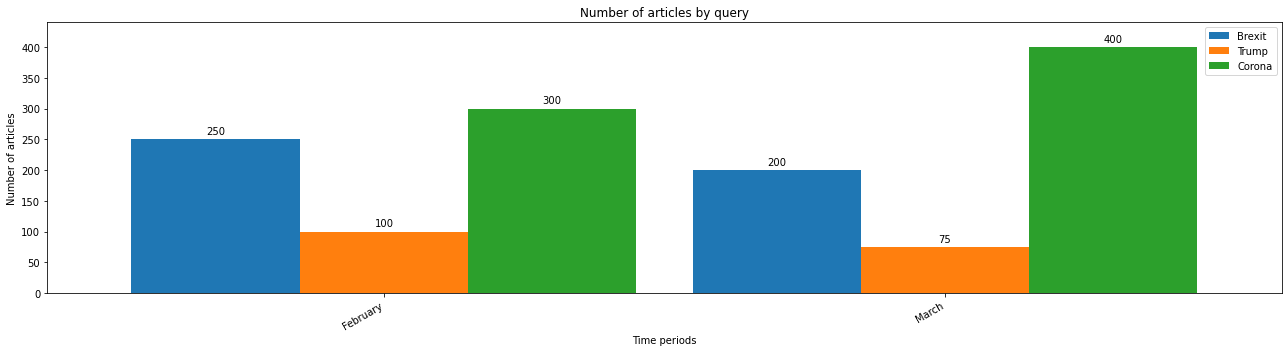

In [1]:
# This is a pre-implemented function for crating the visualisation
# You don't have to modify this

import matplotlib
import matplotlib.pyplot as plt
import numpy as np

def plot_no_articles(dictionary_results, periods):
    '''
    Plots the statistics with the number of articles in the past month.
    
    dictionary_results = dictionary of the form query_term: [no_articles_for_period_1, no_articles_for_period_2, ...]
        e.g. {'Brexit':[250, 200], 'Trump':[100, 75], 'Corona':[300, 400]}
             if you group articles by month periods, and 
             you have looked only at the past two months, and
             there were 250 hits for Brexit in February, and 200 in March, and
             there were 100 hits for Trump in February, and 75 in March, and
             there were 300 hits for Corona in February, and 400 in March
    periods = list of time periods used for the investigation
        e.g. ['February', 'March']
             if you have considered the past two months
    '''
    d = dictionary_results
    labels = periods
    query_terms = list(d.keys())
    list_0 = d[query_terms[0]]
    list_1 = d[query_terms[1]]
    list_2 = d[query_terms[2]]
    
    # locations for labels
    x = np.arange(0, len(labels))
    # width per bar
    width = 0.3
    
    # Building the subplots
    fig, ax = plt.subplots(figsize=(18,5))
    rects1 = ax.bar(x - width, list_0, width, label=query_terms[0])
    rects2 = ax.bar(x, list_1, width, label=query_terms[1])
    rects3 = ax.bar(x + width, list_2, width, label=query_terms[2])

    # Labeling
    ax.set_xlabel('Time periods')
    ax.set_ylabel('Number of articles')
    ax.set_title('Number of articles by query')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.autoscale()
    xmin = -2*width
    xmax = max(np.arange(len(labels)))+2*width
    ymin = 0
    ymax = max(list_0+list_1+list_2)*1.1 
    ax.set(xlim=(xmin, xmax), ylim=(ymin, ymax))
    ax.legend(loc='best')


    def autolabel(rects):
        """Attach a text label above each bar in *rects*, displaying its height."""
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{}'.format(height),
                        xy=(rect.get_x() + rect.get_width() /2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')


    autolabel(rects1)
    autolabel(rects2)
    autolabel(rects3)
    
    fig.autofmt_xdate()

    fig.tight_layout()

    plt.show()

# Below there is one example of how to use the above plot function
dict_results2 = {'Brexit':[250, 200], 'Trump':[100, 75], 'Corona':[300, 400]}
plot_no_articles(dict_results2, ['February', 'March'])


#### Your solution for the third exercise

In [10]:
import time

In [24]:
### Code for task 3
def number_of_hits(query:str):
    url = "https://api.nytimes.com/svc/search/v2/articlesearch.json?q=%s&api-key=v2N2XOGrkcRVM2GGesxJOZwH0slWmGb4" % query
    json_req = json.loads(requests.get(url).text)
    return json_req['response']['meta']['hits']

# Uncomment to test
#print("Number of Hits: %s" % number_of_hits("Trump"))

In [115]:
### Code for task 4

# By default we get 10 results (0 to 9)

def get_all_results(query:str):
    url = "https://api.nytimes.com/svc/search/v2/articlesearch.json?q=%s&page=0&api-key=v2N2XOGrkcRVM2GGesxJOZwH0slWmGb4" % query
    json_results = json.loads(requests.get(url).text)
    # API sais max is 200 (min is 0)
    for i in range (1, min(json_results['response']['meta']['hits']//10, 200)):
        url = "https://api.nytimes.com/svc/search/v2/articlesearch.json?q=%s&page=%s&api-key=v2N2XOGrkcRVM2GGesxJOZwH0slWmGb4" % (query, i)
        
        if "fault" in json_results:
            print("Error")
            return json_results

        json_results['response']['docs'].extend(json.loads(requests.get(url).text)['response']['docs'])
        # a little delay to prevent quota-error
        time.sleep(2)
    return json_results

# Test - Takes up to 2*200sec! - Better not to run it, since you can't run the next one
#print(len(get_all_results("Trump")['results']['docs']))

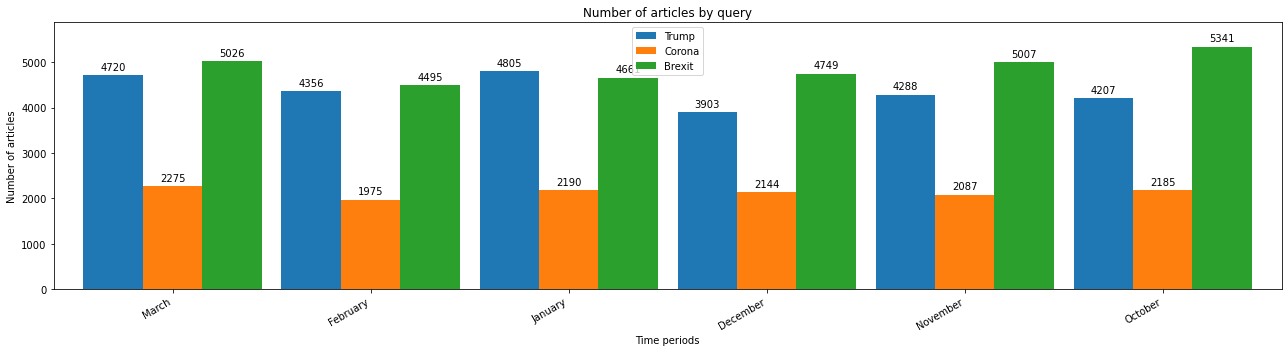

In [28]:
### Code for task 5
from datetime import datetime, timedelta

queries = {"Trump": [], "Corona": [], "Brexit": []}

date = datetime.now()

# fence problem
date += timedelta(days=30)

# Goes 6 months back
for _ in range(0, 6):
    # subtracts a month
    date -= timedelta(days=30)
    str_date = date.strftime("%m")
    for query in queries:
        queries[query].append(number_of_hits("%s&fq=pub_month:(%s)" % (query, str_date)))
    # To prevent the quota limit exeed error
    time.sleep(10)

plot_no_articles(queries, ["March", "February", "January", "December", "November", "October"])


Congratulations for completing the second notebook! Now it’s time for feedback.
1.	Pass your solution to the other pair in your group.
2.	Include your feedback in the other pair’s notebook. Don’t forget to add your names at the top.
3.	Return the notebook with feedback to the original pairs.
4.	Upload your notebook, with the feedback included by the other pair on OLAT.

You can think of/suggest (among other things)
 - improvements in the code (e.g. readability, efficiency)
 - improvements in the answers (e.g. are they easy to understand, are they correct, how can they be improved?)
 - point out differences (e.g. are there any differences between the responses of the two pairs? if yes what are they, what is the cause, and in which way can they be useful?)
 
Not all suggestions about the type of feedback apply to all types of questions. Try to give feedback in a meaningful and constructive way.

Below there is space for giving feedback. This space should be used only by the other pair in your group.

Feedback here